[зарегистрировал приложени по инструкции](https://vk.com/app7248636)

In [4]:
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm
import pickle  # пакет для сохранения и подгрузки питонячих объектов


from bs4 import BeautifulSoup as bs
import requests
import json
import codecs
from pandas.io.json import json_normalize
import seaborn as sns
import numpy as np
import re

https://oauth.vk.com/authorize?client_id=7248636&scope=270422&redirect_uri=https://oauth.vk.com/blank.html&display=page&response_type=token

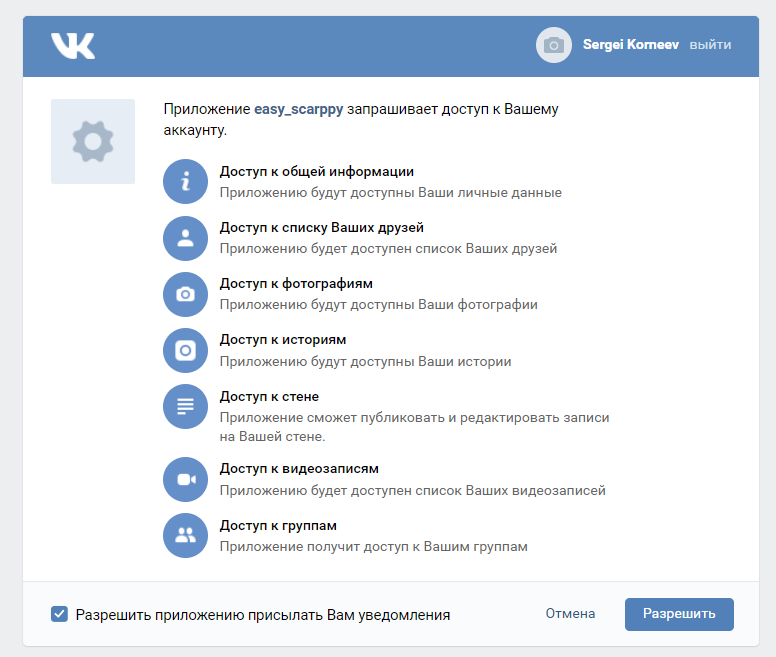

In [3]:
# по музыке похоже нельзя получить доступ, поэтому у меня scope = 270422
from IPython.display import Image
Image(filename='get_token.png')

In [19]:
# мой номер странички
myid = '371834160'# вставить номер странички

# версия используемого API
version = '5.103' 

# подгружаем токен
with open('C:/Users/Asus/GitHab_repos/vk_at.txt') as f:
    token = f.read()

In [20]:
url = "https://api.vk.com/method/users.get?user_ids={user_id}&access_token={token}&v={version}"
url = url.format(user_id=myid, token=token, version=version)
response = requests.get(url) 
response

<Response [200]>

### Ура!!!

In [67]:
def vkDownload(method, parameters, token=token, version=version):
    """
        Возвращает результат запроса по методу
        
        method: string
            метод из документации, который хотим использовать
            
        parameters: string
            параметры используемого метода
            
        token: string
            токен Oauth доступа
        
        version: string
            версия API
    """
    
    # составляем ссылку
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    # запрашиваем ссылку и переводим в json (словарь)
    response = requests.get(url).json()
    
    return response

## тест

In [22]:
method = 'users.get'
parameters = 'user_ids=' + myid

my_name = vkDownload(method, parameters)
my_name

{'response': [{'id': 371834160,
   'first_name': 'Sergei',
   'last_name': 'Korneev',
   'is_closed': False,
   'can_access_closed': True}]}

[парсим](https://vk.com/millwallmoscow)

**Качать внимательно:**


* лимит 50000 id в день!


* количество участников сообщества, информацию о которых необходимо получить = 1000!

In [70]:
intresting_groups ={
     'FACE' : 'face',
     'элджей' : 'sayonaraboy',
     'ATL' : 'atl_acidhouze',
     'oxxxymironofficial' : 'oxxxymiron',
     'antoha' : 'antoha_mc'
    }


# Основные параметры, которые мы хотим получить
fields = 'sex, bdate, city, status'

In [55]:
def getGroupMembers(group_id):
    """
        Возвращает список всех пользователей данной группы
        Итерации идут батчами по 1000 пользователей
        
        group_id: string
            идентификатор группы (ссылка)
    """

    
    # вектор, где мы будем хранить id пользователей
    members = []     
    
    for i in tqdm_notebook(range(100)): 
        # при помощи метода groups.getMembers получаем пользователей группы
        current_members = vkDownload('groups.getMembers','group_id='+group_id)
        members.extend(current_members['response']['items'])
        # перед следующим запросом немножко подождем
        time.sleep(0.4)
        
    
# сохранение:

    with open(f'{group_id}_ids', 'wb') as fp:
        pickle.dump(members, fp)
        
    return members

In [56]:
%time

infa = getGroupMembers('oxxxymiron')
len(infa)

Wall time: 0 ns


100000

### Открыть список id с компа:

In [42]:
with open('face_ids', 'rb') as f:
    face_ids = pickle.load(f)
face_ids[:5]

[48, 619, 1544, 1956, 2019]

In [80]:
oxxxymiron_fans_infa = ','.join([str(user) for user in infa])

def vkDownload(method, parameters, token=token, version=version):
    """
        Возвращает результат запроса по методу
        
        method: string
            метод из документации, который хотим использовать
            
        parameters: string
            параметры используемого метода
            
        token: string
            токен Oauth доступа
        
        version: string
            версия API
    """
    
    # составляем ссылку
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    # запрашиваем ссылку и переводим в json (словарь)
    response = requests.get(url).json()
    
    return response

# качаем инфу по фанам:
vkDownload('users.get', 'user_ids={}&fields={}'.format(oxxxymiron_fans_infa, fields))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

#### Скачиваем 25000

**на выходе получим словарь:**

{test_group_id:[
    
    
user_1_id
    
    
user_2_id
    
    
user_3_id
    
    
    ...
    
    
]}